# 연령대 별 특성 분석
연령대 별로 어떠한 특성을 가지고 있는지 분석해보았다.
심리데이터에서 분석한 항목은 다음과 같다.
* Qh_  : 사람들은 재산을 잃는 것보다 부모의 죽음을 더 쉽게 잊는다.
* Qj_  : 사람들은 악랄하며 기회가 주어지면 그 악랄함이 드러난다.
* tp05 : 나는 새롭고 복잡한 경험을 할 준비가 되어있다.
* tp06 : 나는 말수가 적고 조용하다.

In [116]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
# read data
data = pd.read_csv("data.csv")
data.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1


In [118]:
# check null data
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

index    0
QaA      0
QaE      0
QbA      0
QbE      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 78, dtype: int64

In [119]:
# change tp score
for i in range(1, 10):
    data[f'tp0{i}'] = 7 - data[f'tp0{i}']
data['tp10'] = 7 - data['tp10']

In [120]:
# merge 50s, 60s, and +70s as 50s
data.age_group = data.age_group.apply(lambda x: '50s' if x in ['50s', '60s', '+70s'] else x)

## 주어진 문항에 대한 연령대 별 분석  

---

### Q1: 사람들은 재산을 잃는 것보다 부모의 죽음을 더 쉽게 잊는다.
* 1: Disagree ~ 5: Agree
* 50s는 50대 이상의 데이터를 포함

In [121]:
pivot = pd.pivot_table(data = data, index = "age_group", columns = "QhA", aggfunc = "size", fill_value = 0)
pivot['Total'] = pivot.sum(axis=1)
for i in range(1, 6):
    pivot.loc[f'{i}0s'] = pivot.loc[f'{i}0s']/pivot['Total'][f'{i}0s']
pivot

QhA,1.0,2.0,3.0,4.0,5.0,Total
age_group,,,,,,
10s,0.397890,0.175167,0.149138,0.149279,0.128526,1
20s,0.428784,0.164257,0.140448,0.135133,0.131378,1
30s,0.485707,0.146376,0.124553,0.120470,0.122894,1
40s,0.547020,0.129281,0.109087,0.112057,0.102554,1
50s,0.543075,0.129921,0.098194,0.111857,0.116952,1


Text(0.5, 1.0, 'QhA')

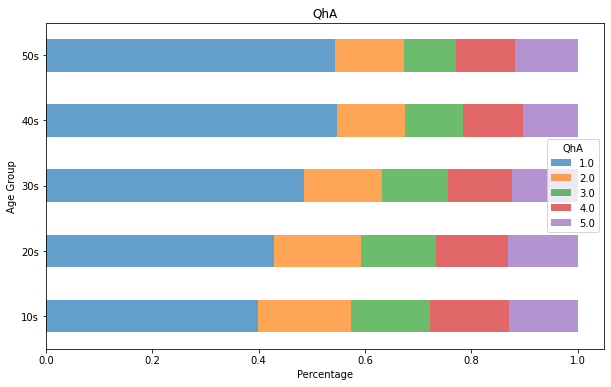

In [122]:
pivot.drop(['Total'], axis=1, inplace=True)
pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('QhA')

* 연령대가 올라갈수록 돈보다 부모의 안위를 생각함을 알 수 있다.
* 10대, 20대는 돈을 더 중요시하는 경향이 있다.

---

### Q2: 사람들은 악랄하며 기회가 주어지면 그 악랄함이 드러난다.
* 1: Disagree ~ 5: Agree
* 50s는 50대 이상의 데이터를 포함

In [123]:
pivot = pd.pivot_table(data = data, index = "age_group", columns = "QjA", aggfunc = "size", fill_value = 0)
pivot['Total'] = pivot.sum(axis=1)
for i in range(1, 6):
    pivot.loc[f'{i}0s'] = pivot.loc[f'{i}0s']/pivot['Total'][f'{i}0s']
pivot

QjA,1.0,2.0,3.0,4.0,5.0,Total
age_group,,,,,,
10s,0.073233,0.127119,0.127612,0.312065,0.359972,1
20s,0.083050,0.140873,0.110899,0.321925,0.343254,1
30s,0.119193,0.159775,0.107580,0.307427,0.306023,1
40s,0.171253,0.174619,0.093843,0.306276,0.254009,1
50s,0.258916,0.177629,0.088930,0.267717,0.206809,1


Text(0.5, 1.0, 'QjA')

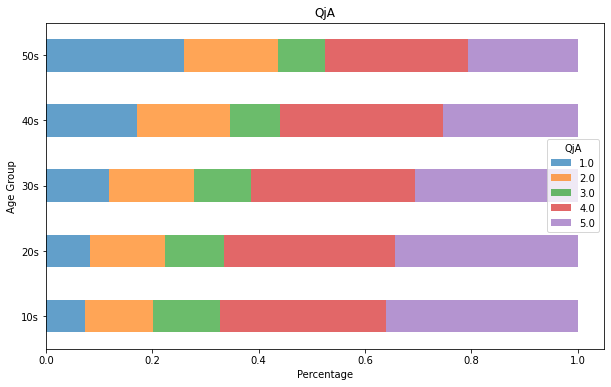

In [124]:
pivot.drop(['Total'], axis=1, inplace=True)
pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('QjA')

* 연령대가 올라갈수록 사람의 본성은 선하다고 보는 경향이 있다.
* 10대, 20대는 기회만 된다면 사람의 악한 본성이 나온다고 보는 비율이 높다.

---

### Q3: 나는 새롭고 복잡한 경험을 할 준비가 되어있다.
* 0: No response
* 1: Disagree ~ 7: Agree
* 50s는 50대 이상의 데이터를 포함

In [125]:
pivot = pd.pivot_table(data = data, index = "age_group", columns = "tp05", aggfunc = "size", fill_value = 0)
pivot['Total'] = pivot.sum(axis=1)
for i in range(1, 6):
    pivot.loc[f'{i}0s'] = pivot.loc[f'{i}0s']/pivot['Total'][f'{i}0s']
pivot

tp05,0,1,2,3,4,5,6,7,Total
age_group,,,,,,,,,
10s,0.004784,0.013718,0.029757,0.063384,0.072529,0.209216,0.281182,0.325431,1
20s,0.003614,0.010558,0.023030,0.051871,0.056831,0.198696,0.294076,0.361324,1
30s,0.003828,0.008423,0.027565,0.051940,0.056151,0.190658,0.305641,0.355794,1
40s,0.009503,0.008513,0.028509,0.054445,0.050089,0.173629,0.322114,0.353197,1
50s,0.021769,0.012506,0.031264,0.045855,0.051876,0.144975,0.350162,0.341593,1


Text(0.5, 1.0, 'tp05')

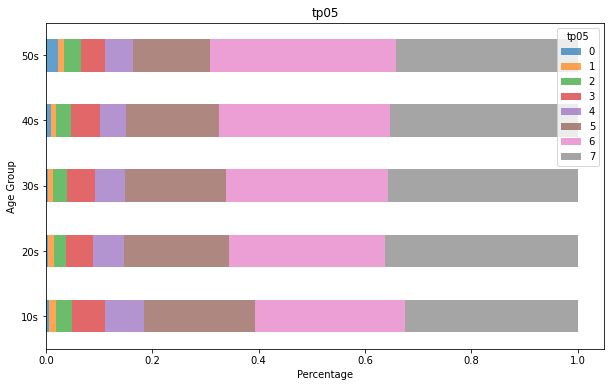

In [126]:
pivot.drop(['Total'], axis=1, inplace=True)
pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('tp05')

* 새롭고 복잡한 경험을 할 준비가 되었는지에 대한 질문에, 연령대 별 유의미한 차이는 발견할 수 없었다.

---

### Q4: 나는 말수가 적고 조용하다.
* 0: No response
* 1: Disagree ~ 7: Agree
* 50s는 50대 이상의 데이터를 포함

In [127]:
pivot = pd.pivot_table(data = data, index = "age_group", columns = "tp06", aggfunc = "size", fill_value = 0)
pivot['Total'] = pivot.sum(axis=1)
for i in range(1, 6):
    pivot.loc[f'{i}0s'] = pivot.loc[f'{i}0s']/pivot['Total'][f'{i}0s']
pivot

tp06,0,1,2,3,4,5,6,7,Total
age_group,,,,,,,,,
10s,0.005065,0.093915,0.095181,0.096096,0.090257,0.208301,0.193247,0.217939,1
20s,0.004039,0.091199,0.089782,0.103104,0.089923,0.209821,0.192885,0.219246,1
30s,0.004084,0.111409,0.108984,0.114982,0.094308,0.212098,0.183257,0.170878,1
40s,0.007919,0.129281,0.126114,0.113839,0.089685,0.204514,0.175807,0.152841,1
50s,0.021769,0.136174,0.128069,0.096572,0.088467,0.191755,0.196156,0.141038,1


Text(0.5, 1.0, 'tp06')

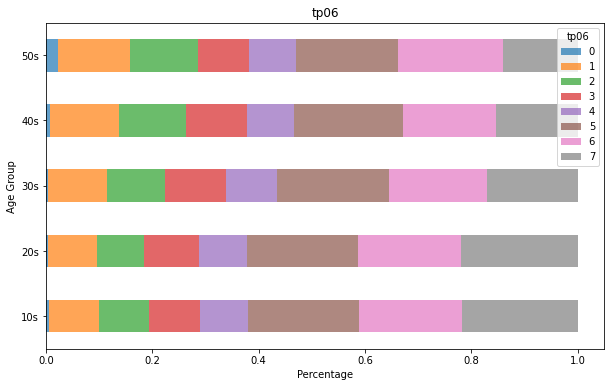

In [128]:
pivot.drop(['Total'], axis=1, inplace=True)
pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('tp06')

* 연령대가 올라갈수록 자기 자신이 말수가 많아지고 조용하지 않다고 생각하는 경향이 있다.
* 10대, 20대는 자기 자신이 말수가 적고 조용하지 않다고 생각하는 경향이 있다.

---

## 연령대 별 분석 결과
* 나이가 적을수록 부모의 안위보다 돈을 더 우선시하는 경향이 있다.
* 나이가 적을수록 인간의 악한 본성이 나온다고 생각하는 경향이 있다.
* 나이가 적을수록 자기 자신이 말수가 적고 조용하다고 생각하는 경향이 있다.
* 복잡하고 새로운 경험을 하는 데에 있어선 나이에 상관이 없었다.

그렇다면, 연령에 따른 경향성을 보이는 경우에는  
어떠한 환경적/유전적 요인이 영향을 미쳤을까?

---

## 연령대 별 경향성에 영향을 미치는 요인은?
연령대 별 경향성에 영향을 미치는 요인이 무엇인지 알아보자.  
우선, 환경적 요인으로는 다음 사항들을 알아볼 수 있다.
* 교육수준
* 형제자매 수
* 결혼유무
* 유년기 거주지역
* 영어를 모국어로 사용(미국)  

유전적 요인으로는 다음 사항들을 알아볼 수 있다.
* 성별
* 오른손잡이/왼손잡이

연령대 별 경향성을 보인 QjA, QhA, tp06 데이터에 대해서 알아보자.

---

### 1. 나이가 많을수록 돈보다 부모의 안위를 걱정하는 이유는?

#### 1-1) 교육수준이 영향을 미쳤을까?
* 0: 무응답
* 1: 저학력 ~ 4: 고학력

In [129]:
pivot = pd.pivot_table(data = data, index = "age_group", columns = "education", aggfunc = "size", fill_value = 0)
pivot['Total'] = pivot.sum(axis=1)
for i in range(1, 6):
    pivot.loc[f'{i}0s'] = pivot.loc[f'{i}0s']/pivot['Total'][f'{i}0s']
pivot

education,0,1,2,3,4,Total
age_group,,,,,,
10s,0.008090,0.321702,0.579599,0.078368,0.012241,1
20s,0.009495,0.014668,0.295139,0.495465,0.185232,1
30s,0.014165,0.020036,0.245661,0.434022,0.286115,1
40s,0.015442,0.015838,0.253811,0.418927,0.295981,1
50s,0.020843,0.016443,0.283465,0.371468,0.307781,1


Text(0.5, 1.0, 'education')

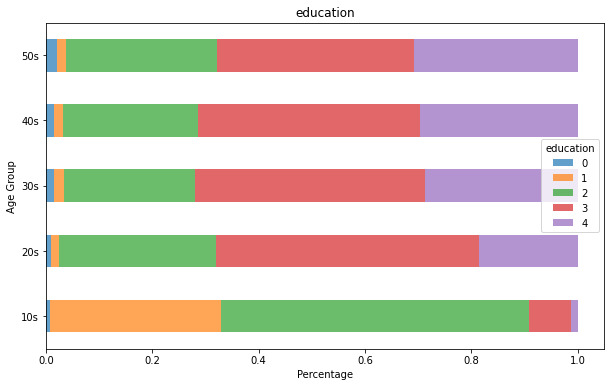

In [130]:
pivot.drop(['Total'], axis=1, inplace=True)
pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('education')

* 교육 수준이 영향을 미친 것은 아닌 것으로 보인다.

#### 1-2) 형제자매 수가 영향을 미쳤을까?
* 형제자매의 수가 7명 이상인 경우는 비율이 매우 적어서 제외

In [131]:
pivot = pd.pivot_table(data = data, index = "age_group", columns = "familysize", aggfunc = "size", fill_value = 0)
pivot = pivot.loc[:, [0, 1, 2, 3, 4, 5, 6]]
pivot['Total'] = pivot.sum(axis=1)
for i in range(1, 6):
    pivot.loc[f'{i}0s'] = pivot.loc[f'{i}0s']/pivot['Total'][f'{i}0s']
pivot

familysize,0,1,2,3,4,5,6,Total
age_group,,,,,,,,
10s,0.029783,0.149127,0.422729,0.252654,0.098397,0.034485,0.012825,1
20s,0.033194,0.166475,0.412631,0.241270,0.097356,0.035781,0.013292,1
30s,0.024653,0.145582,0.416115,0.255612,0.100817,0.041261,0.015960,1
40s,0.018285,0.127997,0.394352,0.257619,0.126168,0.052011,0.023568,1
50s,0.014071,0.092076,0.270057,0.274994,0.190817,0.100222,0.057764,1


Text(0.5, 1.0, 'familysize')

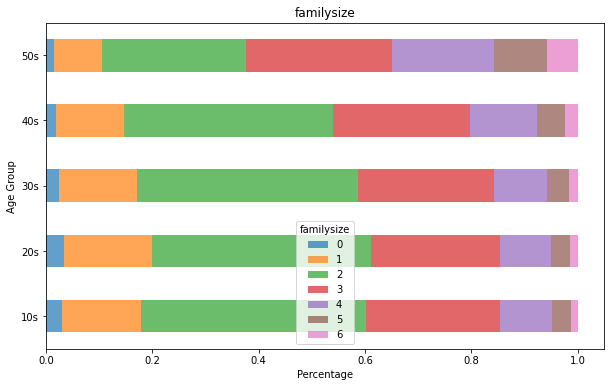

In [132]:
pivot.drop(['Total'], axis=1, inplace=True)
pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('familysize')

* 연령이 높을수록 형제자매의 수가 많아지는 경향을 보인다.
* 그렇다면, 형제자매의 수와 부모를 생각하는 마음 사이에는 인과관계가 있을까?

In [137]:
pivot = pd.pivot_table(data = data, index = "QhA", columns = "familysize", aggfunc = "size", fill_value = 0)
pivot = pivot.loc[:, [0, 1, 2, 3, 4, 5, 6]]
pivot['Total'] = pivot.sum(axis=1)
pivot.loc[1.0] = pivot.loc[1.0]/pivot['Total'][1.0]
pivot.loc[2.0] = pivot.loc[2.0]/pivot['Total'][2.0]
pivot.loc[3.0] = pivot.loc[3.0]/pivot['Total'][3.0]
pivot.loc[4.0] = pivot.loc[4.0]/pivot['Total'][4.0]
pivot.loc[5.0] = pivot.loc[5.0]/pivot['Total'][5.0]
pivot

familysize,0,1,2,3,4,5,6,Total
QhA,,,,,,,,
1.0,0.022728,0.131518,0.399703,0.261599,0.117158,0.046843,0.020451,1
2.0,0.026555,0.153934,0.408691,0.248083,0.108208,0.038341,0.016189,1
3.0,0.032941,0.150924,0.406723,0.250588,0.106723,0.037311,0.014790,1
4.0,0.026890,0.166751,0.397599,0.247083,0.100288,0.043633,0.017757,1
5.0,0.039038,0.164648,0.397072,0.230255,0.099584,0.048075,0.021327,1


Text(0.5, 1.0, 'familysize')

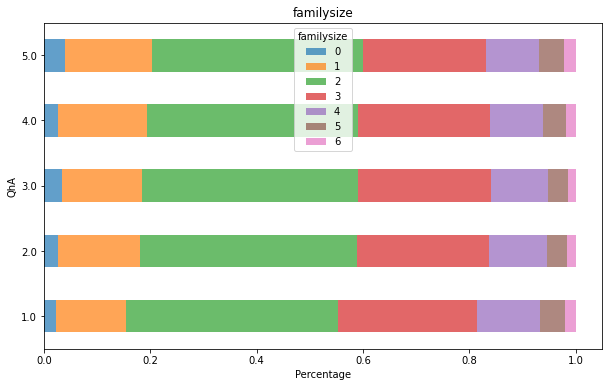

In [138]:
pivot.drop(['Total'], axis=1, inplace=True)
pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('QhA')
plt.title('familysize')

* 형제자매의 수와, 부모를 생각하는 마음 사이에 유의미한 수준의 인과관계는 없는 것으로 보인다.

#### 1-3) 결혼 유무가 영향을 미쳤을까?
* 0: 무응답
* 1: 미혼
* 2: 기혼
* 3: 이혼

In [139]:
pivot = pd.pivot_table(data = data, index = "age_group", columns = "married", aggfunc = "size", fill_value = 0)
pivot['Total'] = pivot.sum(axis=1)
for i in range(1, 6):
    pivot.loc[f'{i}0s'] = pivot.loc[f'{i}0s']/pivot['Total'][f'{i}0s']
pivot

married,0,1,2,3,Total
age_group,,,,,
10s,0.002814,0.990151,0.005135,0.001899,1
20s,0.001346,0.872803,0.105938,0.019912,1
30s,0.001276,0.451633,0.420623,0.126468,1
40s,0.003168,0.215007,0.546822,0.235003,1
50s,0.001853,0.123437,0.563455,0.311255,1


Text(0.5, 1.0, 'married')

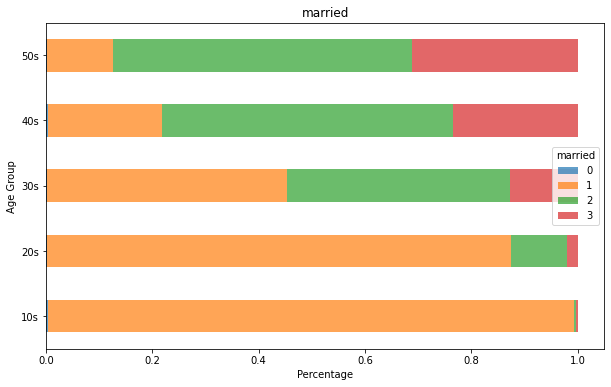

In [140]:
pivot.drop(['Total'], axis=1, inplace=True)
pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('married')

* 나이가 들 수록 혼인률과 이혼률이 높아진다.
* 혼인률과 이혼률이 부모를 생각하는 마음에 영향을 줄 수 있을까?

In [141]:
pivot = pd.pivot_table(data = data, index = "QhA", columns = "married", aggfunc = "size", fill_value = 0)
pivot['Total'] = pivot.sum(axis=1)
pivot.loc[1.0] = pivot.loc[1.0]/pivot['Total'][1.0]
pivot.loc[2.0] = pivot.loc[2.0]/pivot['Total'][2.0]
pivot.loc[3.0] = pivot.loc[3.0]/pivot['Total'][3.0]
pivot.loc[4.0] = pivot.loc[4.0]/pivot['Total'][4.0]
pivot.loc[5.0] = pivot.loc[5.0]/pivot['Total'][5.0]
pivot

married,0,1,2,3,Total
QhA,,,,,
1.0,0.001940,0.647447,0.250521,0.100092,1
2.0,0.001674,0.727717,0.200028,0.070582,1
3.0,0.002974,0.749876,0.181067,0.066083,1
4.0,0.000996,0.731485,0.200930,0.066589,1
5.0,0.003000,0.712546,0.203459,0.080995,1


Text(0.5, 1.0, 'married')

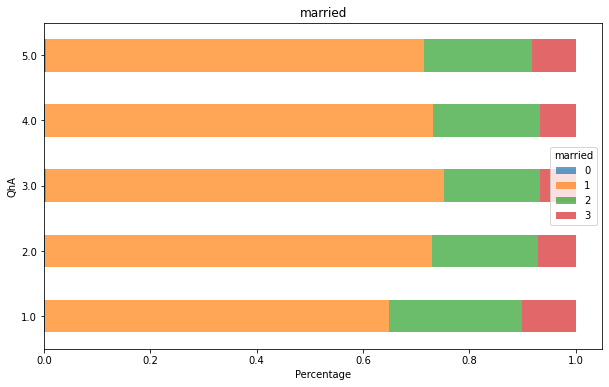

In [142]:
pivot.drop(['Total'], axis=1, inplace=True)
pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('QhA')
plt.title('married')

* 결혼/이혼 여부와 부모를 생각하는 마음 사이에 유의미한 인과관계는 없는 것으로 보인다.

#### 1-4) 유년기 거주 지역이 영향을 미쳤을까?
* 0: 무응답
* 1: 시골 ~ 3: 도시

In [143]:
pivot = pd.pivot_table(data = data, index = "age_group", columns = "urban", aggfunc = "size", fill_value = 0)
pivot['Total'] = pivot.sum(axis=1)
for i in range(1, 6):
    pivot.loc[f'{i}0s'] = pivot.loc[f'{i}0s']/pivot['Total'][f'{i}0s']
pivot

urban,0,1,2,3,Total
age_group,,,,,
10s,0.006191,0.150827,0.441505,0.401477,1
20s,0.005527,0.198484,0.392432,0.403557,1
30s,0.007019,0.235069,0.377361,0.380551,1
40s,0.009503,0.236785,0.387646,0.366066,1
50s,0.012274,0.214451,0.418018,0.355257,1


Text(0.5, 1.0, 'urban')

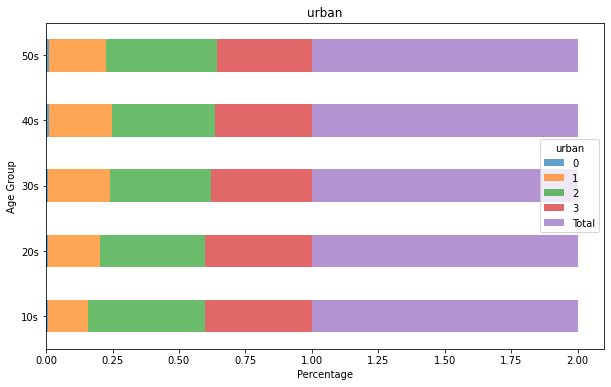

In [144]:
# pivot.drop(['Total'], axis=1, inplace=True)
pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('urban')

* 유년기 거주 지역과 부모를 생각하는 마음 사이에 유의미한 인과관계는 없었다.

#### 1-5) 미국에서 모국어가 영어인 것이 영향을 주었을까?
* 부모에 대한 마음과 사용하는 언어 간에는 인과성이 없을 것으로 판단함

#### 1-6) 성별이 영향을 주었을까?
* 연령에 따라 성별 비율이 유의미하게 다르지 않을 것으로 판단함

#### 1-7) 오른손잡이/왼손잡이가 영향을 주었을까?
* 0: 무응답
* 1: 오른손잡이
* 2: 왼손잡이
* 3: 양손잡이

In [145]:
pivot = pd.pivot_table(data = data, index = "age_group", columns = "hand", aggfunc = "size", fill_value = 0)
pivot['Total'] = pivot.sum(axis=1)
for i in range(1, 6):
    pivot.loc[f'{i}0s'] = pivot.loc[f'{i}0s']/pivot['Total'][f'{i}0s']
pivot

hand,0,1,2,3,Total
age_group,,,,,
10s,0.002955,0.845234,0.106226,0.045586,1
20s,0.003968,0.864016,0.100411,0.031604,1
30s,0.002808,0.863451,0.103241,0.030500,1
40s,0.002970,0.861612,0.101960,0.033459,1
50s,0.006021,0.864289,0.102131,0.027559,1


Text(0.5, 1.0, 'hand')

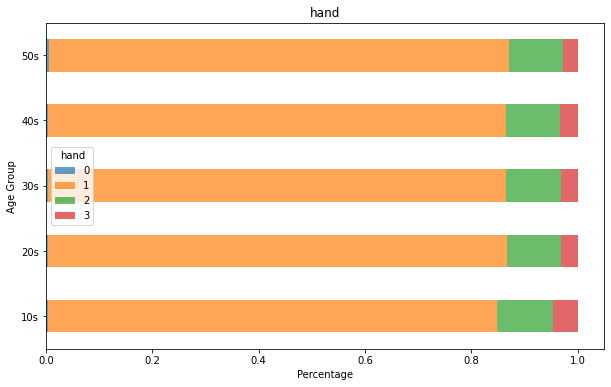

In [146]:
pivot.drop(['Total'], axis=1, inplace=True)
pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('hand')

* 주로 사용하는 손 또한 유의미한 연관성을 찾을 수 없다.

---

## 1번문항 분석 결과
* 유의미한 인과관계를 보이는 요인을 찾을 수 없었음
* 다른 문항에서도 유의미한 결과가 나올 것 같지 않음
* 다른 문항(QjA, tp05, tp06)에 대한 분석 여부는 추후 회의 후 판단해야 할 것으로 보임

---

## To do
TBD